# Connect to google account

In [19]:
from google.colab import drive
drive.mount('/content/data')

Drive already mounted at /content/data; to attempt to forcibly remount, call drive.mount("/content/data", force_remount=True).


In [20]:
# 데이터 시각화에 사용할 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 브라우저에서 바로 그려지도록
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rcParams['font.family'] = 'DejaVu Sans'

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# Global Variables

In [21]:
import os
import numpy as np
import random
import torch

def reset_seeds(seed=52):
  random.seed(seed)
  os.environ['PYTHONHASHSEED'] = str(seed)    # 파이썬 환경변수 시드 고정
  np.random.seed(seed)
  torch.manual_seed(seed) # cpu 연산 무작위 고정
  torch.cuda.manual_seed(seed) # gpu 연산 무작위 고정
  torch.backends.cudnn.deterministic = True  # cuda 라이브러리에서 Deterministic(결정론적)으로 예측하기 (예측에 대한 불확실성 제거 )

In [22]:
import easydict
args = easydict.EasyDict()

# path 정보
args.default_path = '/content/data/MyDrive/ai_lecture 252/1. Machine Learning/data/telco/'

args.train_csv = args.default_path+'train.csv'
args.modify1_train_csv = args.default_path+'modified_telco_customer_data_1.csv'
args.modify2_train_csv = args.default_path+'modified_telco_customer_data_2.csv'
# 데이터 분석을 위한 변수들
args.random_state = 52
args.results = []

In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.ion()

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='matplotlib')

In [24]:
df = pd.read_csv(args.train_csv)
ori_df = df.copy()
modify1_df = pd.read_csv(args.modify1_train_csv)
modify2_df = pd.read_csv(args.modify2_train_csv)

In [25]:
def check_missing_values(df, column_name):

    return df[column_name].isnull().sum()

missing_ori_df = check_missing_values(ori_df, 'TotalCharges')
missing_modify1 = check_missing_values(modify1_df, 'TotalCharges')
missing_modify2 = check_missing_values(modify2_df, 'TotalCharges')

# 결과 출력
print(f'Missing values in original df: {missing_ori_df}')
print(f'Missing values in modify1_df: {missing_modify1}')
print(f'Missing values in modify2_df: {missing_modify2}')

Missing values in original df: 0
Missing values in modify1_df: 0
Missing values in modify2_df: 0


# 기본적인 데이터 전처리

In [26]:
# 1. TotalCharges 컬럼을 수치형(float)으로 변환하는 함수
def convert_column_to_numeric(df, column_name):
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    return df

# 2. 결측값을 평균으로 채우는 함수
def fill_missing_with_mean(df, column_name):
    df[column_name].fillna(df[column_name].mean(), inplace=True)
    return df

# 3. 범주형 변수를 'category' 타입으로 변환하는 함수
def convert_to_category(df, columns):
    df[columns] = df[columns].astype('category')
    return df


# 1. 세 개의 데이터셋에서 TotalCharges 컬럼을 수치형(float)으로 변환
ori_df = convert_column_to_numeric(ori_df, 'TotalCharges')
modify1_df = convert_column_to_numeric(modify1_df, 'TotalCharges')
modify2_df = convert_column_to_numeric(modify2_df, 'TotalCharges')

# 2. TotalCharges의 결측값을 평균값으로 채우기
ori_df = fill_missing_with_mean(ori_df, 'TotalCharges')
modify1_df = fill_missing_with_mean(modify1_df, 'TotalCharges')
modify2_df = fill_missing_with_mean(modify2_df, 'TotalCharges')

# 3. 범주형 변수를 'category' 타입으로 변환
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen']

ori_df = convert_to_category(ori_df, categorical_columns)
modify1_df = convert_to_category(modify1_df, categorical_columns)
modify2_df = convert_to_category(modify2_df, categorical_columns)

# 4. 결측값이 잘 채워졌는지 확인
print('Original df TotalCharges missing values:', ori_df['TotalCharges'].isnull().sum())
print('Modify1 df TotalCharges missing values:', modify1_df['TotalCharges'].isnull().sum())
print('Modify2 df TotalCharges missing values:', modify2_df['TotalCharges'].isnull().sum())

# 5. 변환 후 데이터 타입 확인
print('Original df dtypes:')
print(ori_df.dtypes)
print('\nModify1 df dtypes:')
print(modify1_df.dtypes)
print('\nModify2 df dtypes:')
print(modify2_df.dtypes)

Original df TotalCharges missing values: 0
Modify1 df TotalCharges missing values: 0
Modify2 df TotalCharges missing values: 0
Original df dtypes:
customerID            object
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

Modify1 df dtypes:
customerID            object
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
Multipl

Original Data: 26.54%
Modified Data 1 (Logistic): 11.31%
Modified Data 2 (Logistic): 4.50%


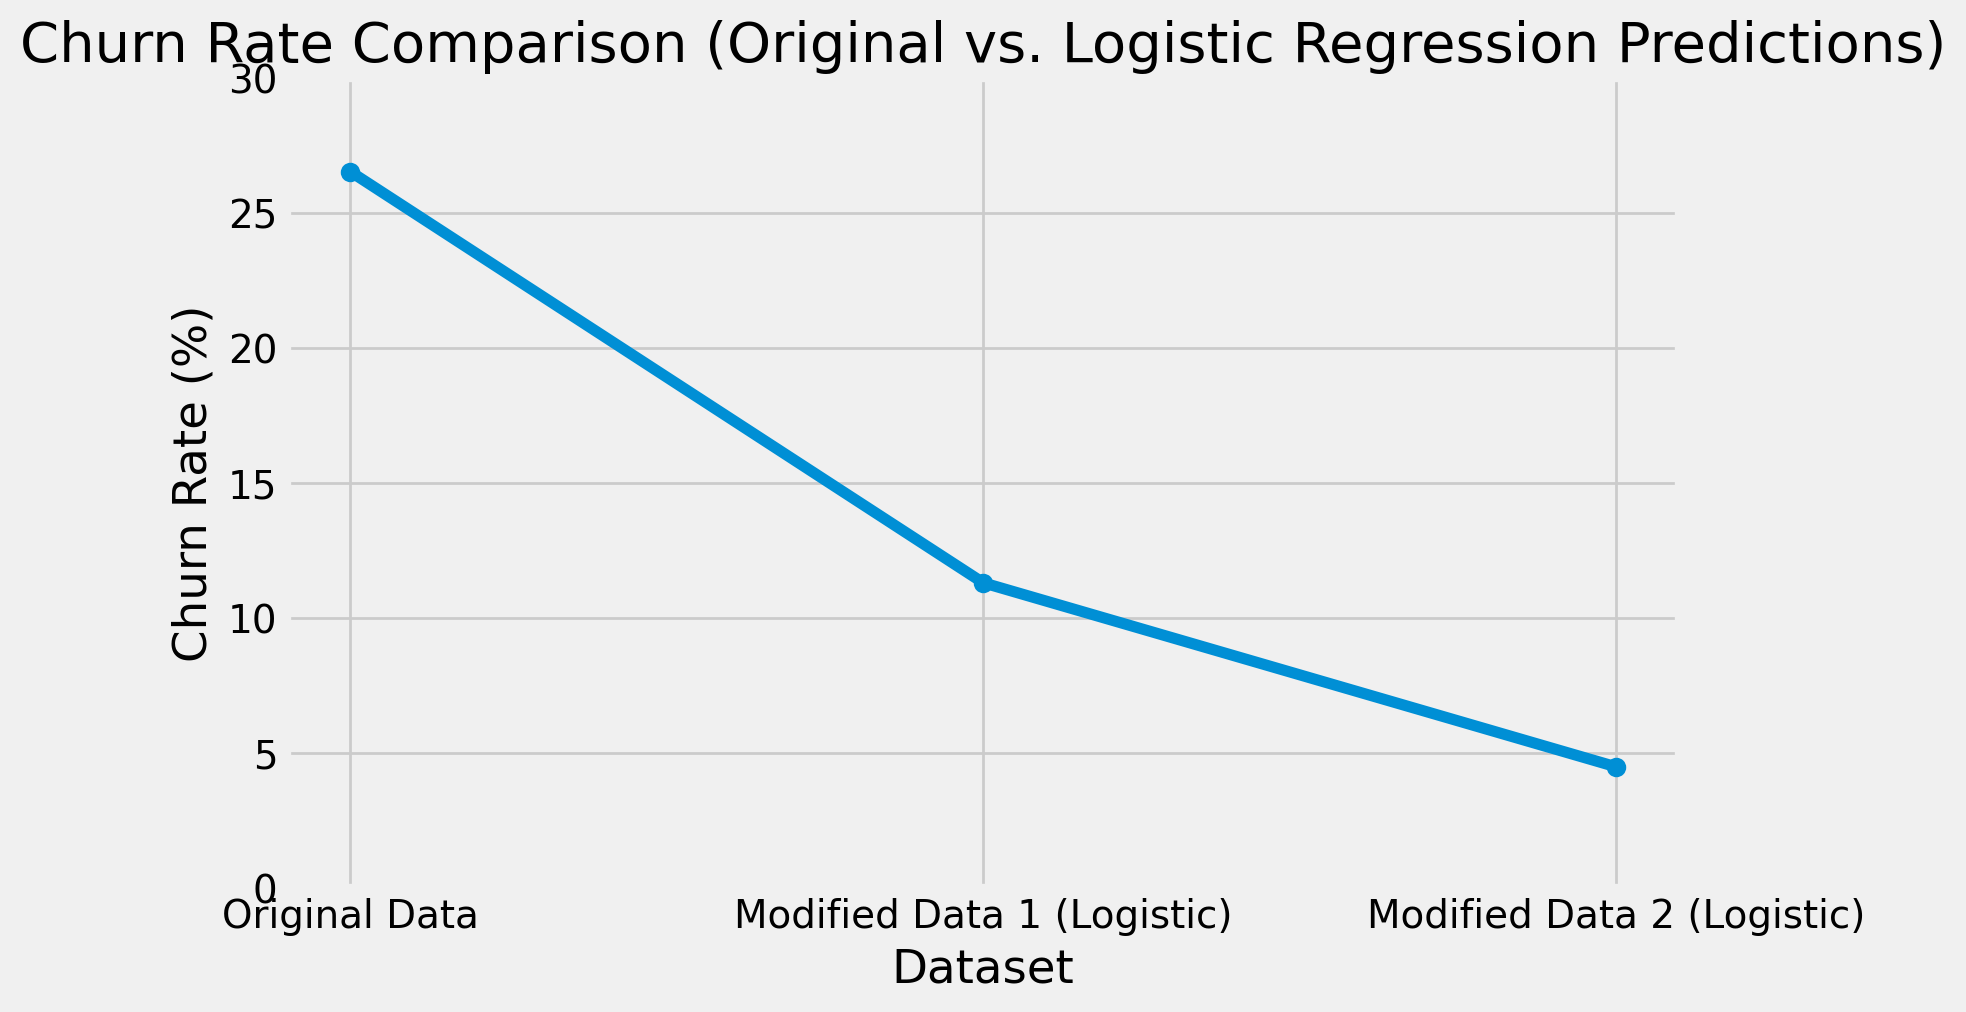

In [27]:
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

reset_seeds()

def preprocess_data(df, label_encoder=None):
    df_encoded = df.drop(columns=['Churn', 'customerID']).copy()
    if label_encoder is None:
        label_encoder = LabelEncoder()

    for column in df_encoded.select_dtypes(include=['category']).columns:
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

    return df_encoded, label_encoder

# 원본 데이터 전처리
X_original, label_encoder = preprocess_data(ori_df)
y_original = ori_df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# 수정된 데이터 전처리 (일관된 LabelEncoder 사용)
X_modified_1, _ = preprocess_data(modify1_df, label_encoder)
y_modified_1 = modify1_df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

X_modified_2, _ = preprocess_data(modify2_df, label_encoder)
y_modified_2 = modify2_df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# 데이터 분리
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, test_size=0.3, random_state=52)
X_train_mod_1, X_test_mod_1, y_train_mod_1, y_test_mod_1 = train_test_split(X_modified_1, y_modified_1, test_size=0.3, random_state=52)
X_train_mod_2, X_test_mod_2, y_train_mod_2, y_test_mod_2 = train_test_split(X_modified_2, y_modified_2, test_size=0.3, random_state=52)

# 원본데이터로 기본 로지스틱회귀 모델로 훈련
logistic_model = LogisticRegression(max_iter=1000, random_state=52)
logistic_model.fit(X_train_original, y_train_original)

# 수정한 데이터로 예측
y_pred_logistic_modified_1 = logistic_model.predict(X_test_mod_1)
y_pred_logistic_modified_2 = logistic_model.predict(X_test_mod_2)

# 이탈율 계산
churn_rate_logistic_modified_1 = (y_pred_logistic_modified_1.sum() / len(y_pred_logistic_modified_1)) * 100
churn_rate_logistic_modified_2 = (y_pred_logistic_modified_2.sum() / len(y_pred_logistic_modified_2)) * 100

# 원본 데이터 이탈율
churn_rate_original = ori_df['Churn'].value_counts(normalize=True)['Yes'] * 100

# 이탈율 비교
churn_rates_logistic = {
    'Original Data': churn_rate_original,
    'Modified Data 1 (Logistic)': churn_rate_logistic_modified_1,
    'Modified Data 2 (Logistic)': churn_rate_logistic_modified_2
}

for data_name, churn_rate in churn_rates_logistic.items():
    print(f"{data_name}: {churn_rate:.2f}%")

# 시각화
plt.figure(figsize=(8, 5))
plt.plot(list(churn_rates_logistic.keys()), list(churn_rates_logistic.values()), marker='o', linestyle='-')
plt.title('Churn Rate Comparison (Original vs. Logistic Regression Predictions)')
plt.xlabel('Dataset')
plt.ylabel('Churn Rate (%)')
plt.ylim(0, 30)
plt.grid(True)
plt.show()

In [28]:
from sklearn.metrics import accuracy_score

# 훈련 데이터에 대한 예측과 정확도 확인
y_train_pred_original = logistic_model.predict(X_train_original)
train_accuracy = accuracy_score(y_train_original, y_train_pred_original)

# 테스트 데이터에 대한 정확도 확인
test_accuracy_mod_1 = accuracy_score(y_test_mod_1, y_pred_logistic_modified_1)
test_accuracy_mod_2 = accuracy_score(y_test_mod_2, y_pred_logistic_modified_2)

# 출력
print(f"Train Accuracy (Original Data): {train_accuracy:.2f}")
print(f"Test Accuracy (Modified Data 1): {test_accuracy_mod_1:.2f}")
print(f"Test Accuracy (Modified Data 2): {test_accuracy_mod_2:.2f}")

Train Accuracy (Original Data): 0.80
Test Accuracy (Modified Data 1): 0.79
Test Accuracy (Modified Data 2): 0.76


Original Data: 26.54%
Modified Data 1 (Logistic): 11.31%
Modified Data 2 (Logistic): 4.50%


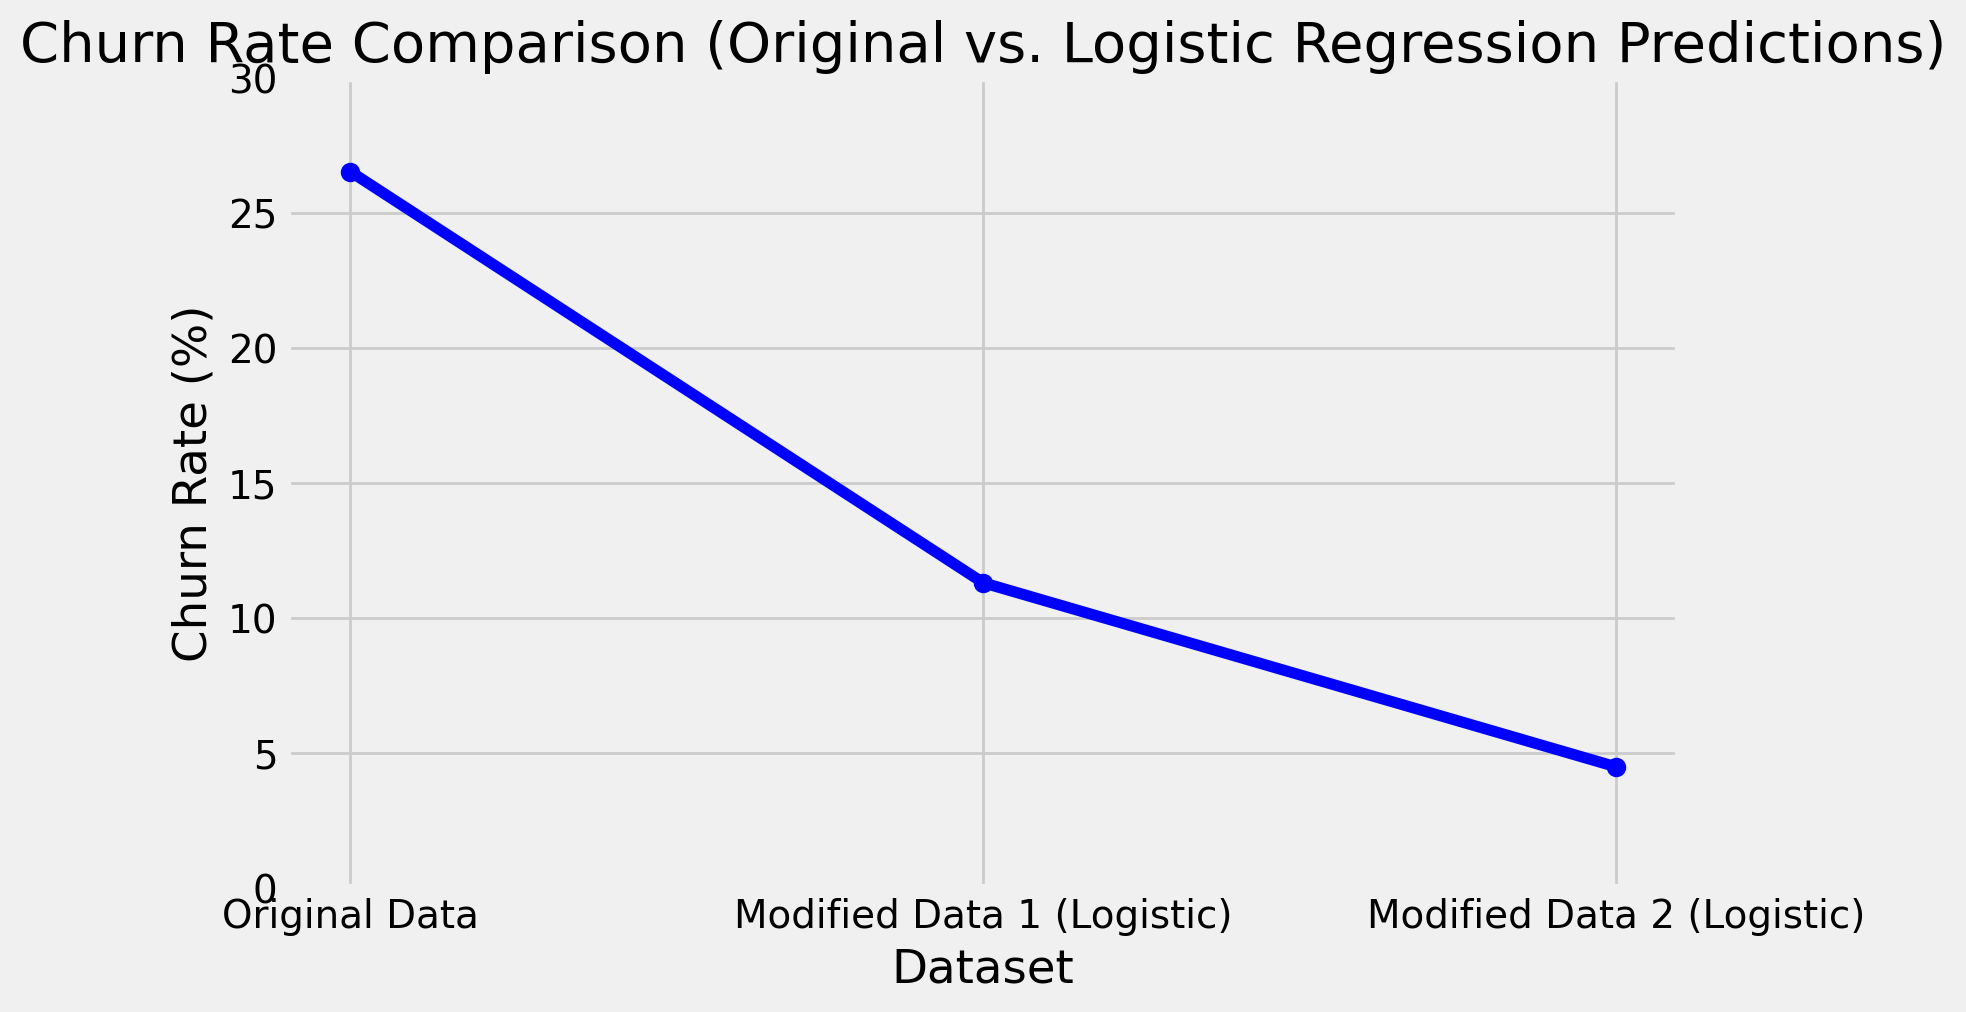

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

reset_seeds()
def preprocess_data(df):
    df_encoded = df.drop(columns=['Churn', 'customerID']).copy()
    for column in df_encoded.select_dtypes(include=['category']).columns:
        df_encoded[column] = LabelEncoder().fit_transform(df_encoded[column])
    return df_encoded

X_original = preprocess_data(ori_df)
y_original = ori_df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

X_modified_1 = preprocess_data(modify1_df)
y_modified_1 = modify1_df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

X_modified_2 = preprocess_data(modify2_df)
y_modified_2 = modify2_df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# 데이터 분리
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, test_size=0.3, random_state=52)
X_train_mod_1, X_test_mod_1, y_train_mod_1, y_test_mod_1 = train_test_split(X_modified_1, y_modified_1, test_size=0.3, random_state=52)
X_train_mod_2, X_test_mod_2, y_train_mod_2, y_test_mod_2 = train_test_split(X_modified_2, y_modified_2, test_size=0.3, random_state=52)

# 원본데이터로 기본 로지스틱회귀 모델로 훈련
logistic_model = LogisticRegression(max_iter=1000, random_state=52)
logistic_model.fit(X_train_original, y_train_original)

# 수정한 데이터로 예측
y_pred_logistic_modified_1 = logistic_model.predict(X_test_mod_1)
y_pred_logistic_modified_2 = logistic_model.predict(X_test_mod_2)

# 이탈율 계산
churn_rate_logistic_modified_1 = (y_pred_logistic_modified_1.sum() / len(y_pred_logistic_modified_1)) * 100
churn_rate_logistic_modified_2 = (y_pred_logistic_modified_2.sum() / len(y_pred_logistic_modified_2)) * 100

# 원본 데이터 이탈율
churn_rate_original = ori_df['Churn'].value_counts(normalize=True)['Yes'] * 100

# 이탈율 비교
churn_rates_logistic = {
    'Original Data': churn_rate_original,
    'Modified Data 1 (Logistic)': churn_rate_logistic_modified_1,
    'Modified Data 2 (Logistic)': churn_rate_logistic_modified_2
}

for data_name, churn_rate in churn_rates_logistic.items():
    print(f"{data_name}: {churn_rate:.2f}%")


# 시각화
plt.figure(figsize=(8, 5))
plt.plot(list(churn_rates_logistic.keys()), list(churn_rates_logistic.values()), marker='o', linestyle='-', color='b')
plt.title('Churn Rate Comparison (Original vs. Logistic Regression Predictions)')
plt.xlabel('Dataset')
plt.ylabel('Churn Rate (%)')
plt.ylim(0, 30)
plt.grid(True)
plt.show()

# 데이터수정

### 이탈 방지 전략에 따른 데이터 수정1

1. **Fiber optic 사용자의 월 요금 10% 할인**
   - Fiber optic 인터넷 서비스를 사용하는 고객에게 10% 할인을 적용.

2. **온라인 보안을 사용하지 않는 고객 중 15%에게 보안 제공 (No -> Yes)**
   - 온라인 보안 서비스를 사용하지 않는 고객의 15%를 무작위로 선택하여 보안 서비스를 제공.

3. **온라인 백업 및 기기 보호를 사용하지 않는 고객 중 15%에게 두 서비스 제공 (No -> Yes)**
   - 온라인 백업과 기기 보호 서비스를 모두 사용하지 않는 고객의 15%를 무작위로 선택하여 두 서비스를 제공.

4. **월 단위 계약을 사용하는 고객 중 15%를 1년 계약으로 전환**
   - 월 단위 계약을 사용하는 고객의 15%를 무작위로 선택하여 1년 계약으로 전환.

5. **전자 수표를 사용하는 고객 중 15%를 신용카드/자동이체로 전환**
   - 전자 수표를 사용하는 고객의 15%를 무작위로 선택하여 신용카드(자동) 또는 은행 이체(자동)로 전환.

6. **기술 지원을 사용하지 않는 고객 중 15%에게 기술 지원 제공 (No -> Yes)**
   - 기술 지원을 사용하지 않는 고객의 15%를 무작위로 선택하여 기술 지원을 제공.

7. **가입 기간이 24개월 이상인 고객의 월 요금 10% 할인**
   - 가입 기간이 24개월 이상인 고객에게 10% 할인을 적용.

8. **가입 기간이 6개월 이하인 신규 고객의 월 요금 20% 할인**
   - 가입 기간이 6개월 이하인 신규 고객에게 20% 할인을 적용.

9. **가입 기간이 12개월 이하이고 월 요금이 높은 고객의 요금 15% 할인**
   - 가입 기간이 12개월 이하이며, 월 요금이 중앙값보다 높은 고객에게 15% 할인을 적용.


In [ ]:
ori_df = df.copy()

def apply_discount(user, discount_percentage):
    ori_df.loc[user, 'MonthlyCharges'] = ori_df.loc[user, 'MonthlyCharges'] * (1 - discount_percentage)

# 1. Fiber optic 사용자의 월 요금 10% 할인
fiber_optic_user = ori_df['InternetService'] == 'Fiber optic'
apply_discount(fiber_optic_user, 0.10)

# 2. 온라인 보안을 사용하지 않는 고객 중 15%에게 보안 제공 (No -> Yes)
online_security_no_user = ori_df['OnlineSecurity'] == 'No'
online_security_indices = ori_df[online_security_no_user].sample(frac=0.15, random_state=52).index
ori_df.loc[online_security_indices, 'OnlineSecurity'] = 'Yes'

# 3. 온라인 백업 및 기기 보호를 사용하지 않는 고객 중 15%에게 두 서비스 제공 (No -> Yes)
backup_protection_no_user = (ori_df['OnlineBackup'] == 'No') & (ori_df['DeviceProtection'] == 'No')
backup_protection_indices = ori_df[backup_protection_no_user].sample(frac=0.15, random_state=52).index
ori_df.loc[backup_protection_indices, ['OnlineBackup', 'DeviceProtection']] = 'Yes'

# 4. 월 단위 계약을 사용하는 고객 중 15%를 1년 계약으로 전환
month_to_month_user = ori_df['Contract'] == 'Month-to-month'
contract_indices = ori_df[month_to_month_user].sample(frac=0.15, random_state=52).index
ori_df.loc[contract_indices, 'Contract'] = 'One year'

# 5. 전자 수표를 사용하는 고객 중 15%를 신용카드/자동이체로 전환
electronic_check_user = ori_df['PaymentMethod'] == 'Electronic check'
payment_indices = ori_df[electronic_check_user].sample(frac=0.15, random_state=52).index
# Randomly assign to either Credit card (automatic) or Bank transfer (automatic)
ori_df.loc[payment_indices, 'PaymentMethod'] = np.random.choice(
    ['Credit card (automatic)', 'Bank transfer (automatic)'], size=len(payment_indices), replace=True)

# 6. 기술 지원을 사용하지 않는 고객 중 15%에게 기술 지원 제공 (No -> Yes)
tech_support_no_user = ori_df['TechSupport'] == 'No'
tech_support_indices = ori_df[tech_support_no_user].sample(frac=0.15, random_state=52).index
ori_df.loc[tech_support_indices, 'TechSupport'] = 'Yes'

# 7. 가입 기간이 24개월 이상인 고객의 월 요금 10% 할인
tenure_24_plus_user = ori_df['tenure'] >= 24
apply_discount(tenure_24_plus_user, 0.10)

# 8. 가입 기간이 6개월 이하인 신규 고객의 월 요금 20% 할인
tenure_6_less_user = ori_df['tenure'] <= 6
apply_discount(tenure_6_less_user, 0.20)

# 9. 가입 기간이 12개월 이하이고 월 요금이 높은 고객의 요금 15% 할인
median_monthly_charges = ori_df['MonthlyCharges'].median()
tenure_12_less_high_charge_user = (ori_df['tenure'] <= 12) & (ori_df['MonthlyCharges'] > median_monthly_charges)
apply_discount(tenure_12_less_high_charge_user, 0.15)

# 10. 타겟 제거
ori_df.drop(columns=['Churn'], inplace=True)

output_file_path = '/content/data/MyDrive/ai_lecture 252/1. Machine Learning/data/telco/modyfied_data/modified_telco_customer_data_1.csv'
ori_df.to_csv(output_file_path, index=False)


### 이탈 방지 전략에 따른 데이터 수정2

1. **Fiber optic 사용자의 월 요금 15% 할인**
   - Fiber optic 인터넷 서비스를 사용하는 사용자에게 15% 할인을 적용.

2. **온라인 보안을 사용하지 않는 고객 중 20%에게 보안 제공 (No -> Yes)**
   - 온라인 보안 서비스를 사용하지 않는 고객의 20%를 무작위로 선택하여 보안 서비스를 제공.

3. **온라인 백업 및 기기 보호를 사용하지 않는 고객 중 20%에게 두 서비스 제공 (No -> Yes)**
   - 온라인 백업과 기기 보호 서비스를 모두 사용하지 않는 고객의 20%를 무작위로 선택하여 두 서비스를 제공.

4. **월 단위 계약을 사용하는 고객 중 20%를 1년 계약으로 전환**
   - 월 단위 계약을 사용하는 고객의 20%를 무작위로 선택하여 1년 계약으로 전환.

5. **전자 수표를 사용하는 고객 중 20%를 신용카드/자동이체로 전환**
   - 전자 수표를 사용하는 고객의 20%를 무작위로 선택하여 신용카드(자동) 또는 은행 이체(자동)로 전환.

6. **기술 지원을 사용하지 않는 고객 중 20%에게 기술 지원 제공 (No -> Yes)**
   - 기술 지원을 사용하지 않는 고객의 20%를 무작위로 선택하여 기술 지원을 제공.

7. **가입 기간이 24개월 이상인 고객의 월 요금 15% 할인**
   - 가입 기간이 24개월 이상인 고객에게 15% 할인을 적용.

8. **가입 기간이 6개월 이하인 신규 고객의 월 요금 20% 할인**
   - 가입 기간이 6개월 이하인 신규 고객에게 20% 할인을 적용.

9. **가입 기간이 12개월 이하이고 월 요금이 높은 고객의 요금 15% 할인**
   - 가입 기간이 12개월 이하이며, 월 요금이 중앙값보다 높은 고객에게 15% 할인을 적용.


In [ ]:
ori_df = df.copy()

def apply_discount(user, discount_percentage):
    ori_df.loc[user, 'MonthlyCharges'] = ori_df.loc[user, 'MonthlyCharges'] * (1 - discount_percentage)

# 1. Fiber optic 사용자의 월 요금 15% 할인
fiber_optic_user = ori_df['InternetService'] == 'Fiber optic'
apply_discount(fiber_optic_user, 0.15)

# 2. 온라인 보안을 사용하지 않는 고객 중 20%에게 보안 제공 (No -> Yes)
online_security_no_user = ori_df['OnlineSecurity'] == 'No'
online_security_indices = ori_df[online_security_no_user].sample(frac=0.20, random_state=52).index
ori_df.loc[online_security_indices, 'OnlineSecurity'] = 'Yes'

# 3. 온라인 백업 및 기기 보호를 사용하지 않는 고객 중 20%에게 두 서비스 제공 (No -> Yes)
backup_protection_no_user = (ori_df['OnlineBackup'] == 'No') & (ori_df['DeviceProtection'] == 'No')
backup_protection_indices = ori_df[backup_protection_no_user].sample(frac=0.20, random_state=52).index
ori_df.loc[backup_protection_indices, ['OnlineBackup', 'DeviceProtection']] = 'Yes'

# 4. 월 단위 계약을 사용하는 고객 중 20%를 1년 계약으로 전환
month_to_month_user = ori_df['Contract'] == 'Month-to-month'
contract_indices = ori_df[month_to_month_user].sample(frac=0.20, random_state=52).index
ori_df.loc[contract_indices, 'Contract'] = 'One year'

# 5. 전자 수표를 사용하는 고객 중 20%를 신용카드/자동이체로 전환
electronic_check_user = ori_df['PaymentMethod'] == 'Electronic check'
payment_indices = ori_df[electronic_check_user].sample(frac=0.20, random_state=52).index
# Randomly assign to either Credit card (automatic) or Bank transfer (automatic)
ori_df.loc[payment_indices, 'PaymentMethod'] = np.random.choice(
    ['Credit card (automatic)', 'Bank transfer (automatic)'], size=len(payment_indices), replace=True)

# 6. 기술 지원을 사용하지 않는 고객 중 20%에게 기술 지원 제공 (No -> Yes)
tech_support_no_user = ori_df['TechSupport'] == 'No'
tech_support_indices = ori_df[tech_support_no_user].sample(frac=0.20, random_state=52).index
ori_df.loc[tech_support_indices, 'TechSupport'] = 'Yes'

# 7. 가입 기간이 24개월 이상인 고객의 월 요금 15% 할인
tenure_24_plus_user = ori_df['tenure'] >= 24
apply_discount(tenure_24_plus_user, 0.15)

# 8. 가입 기간이 6개월 이하인 신규 고객의 월 요금 20% 할인
tenure_6_less_user = ori_df['tenure'] <= 6
apply_discount(tenure_6_less_user, 0.20)

# 9. 가입 기간이 12개월 이하이고 월 요금이 높은 고객의 요금 15% 할인
median_monthly_charges = ori_df['MonthlyCharges'].median()
tenure_12_less_high_charge_user = (ori_df['tenure'] <= 12) & (ori_df['MonthlyCharges'] > median_monthly_charges)
apply_discount(tenure_12_less_high_charge_user, 0.15)

# 10. 타겟 제거
ori_df.drop(columns=['Churn'], inplace=True)

output_file_path = '/content/data/MyDrive/ai_lecture 252/1. Machine Learning/data/telco/modyfied_data/modified_telco_customer_data_2.csv'
ori_df.to_csv(output_file_path, index=False)
